## Get a frame stream from a merlin detector

If you want to use this with the simulated data source, run something like this in the background:

`libertem-live-mib-sim ~/Data/default.hdr --cached=MEM --wait-trigger`

The `--wait-trigger` option is important for this notebook to function correctly since that allows to drain the data socket before an acquisition like it is necessary for a real-world Merlin detector.

On Linux, `MEMFD` is also supported as a cache. Use `NONE` to deactivate the cache.

In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# set this to the host/port where the merlin data server is listening:
MERLIN_DATA_SOCKET = ('127.0.0.1', 6342)
MERLIN_CONTROL_SOCKET = ('127.0.0.1', 6341)
NAV_SHAPE = (128, 128)
SIG_SHAPE = (256, 256)

In [23]:
%matplotlib nbagg

In [24]:
import time
import logging
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from libertem_live.detectors.merlin import MerlinDataSource
from libertem_live.detectors.merlin import MerlinControl
# Used here to emulate triggering and a blocking function that waits
# for a scan to finish
from libertem_live.detectors.merlin.sim import TriggerClient

In [26]:
%autoreload
data_source = MerlinDataSource(host=MERLIN_DATA_SOCKET[0], port=MERLIN_DATA_SOCKET[1], pool_size=3, sig_shape=SIG_SHAPE)
control = MerlinControl(host=MERLIN_CONTROL_SOCKET[0], port=MERLIN_CONTROL_SOCKET[1])

In [27]:
%autoreload
result = np.zeros(SIG_SHAPE, dtype=np.float32)

In [28]:
%autoreload
with control:  # This connects the control socket
    # Here go Merlin control commands
    with data_source:  # This connects the data socket
        data_source.socket.drain()
        control.cmd('SOFTTRIGGER')
        for frames in data_source.stream(num_frames=np.prod(NAV_SHAPE), chunk_size=128):
            result += frames.buf.sum(axis=0)

<IPython.core.display.Javascript object>


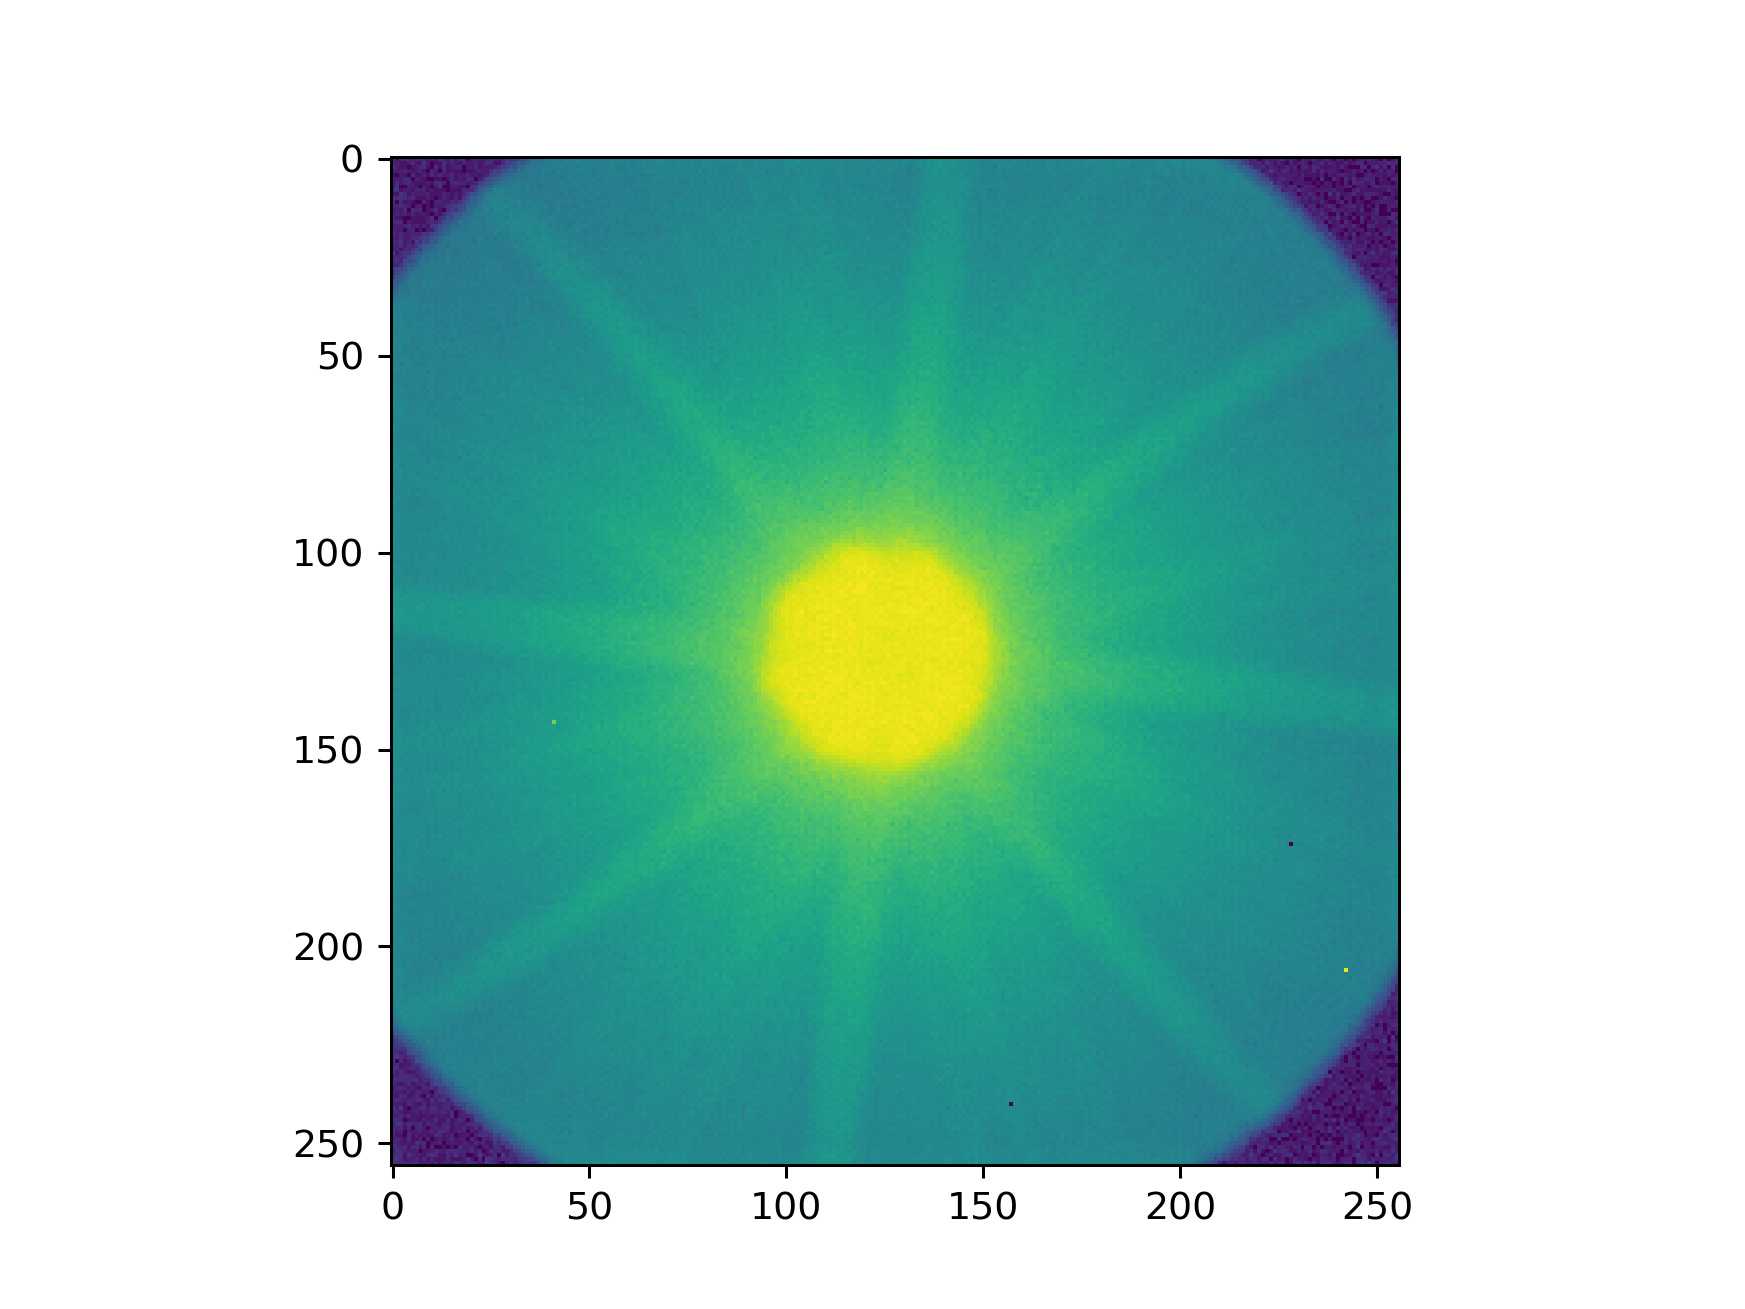

In [29]:
ax, fig = plt.subplots()
fig.imshow(np.log1p(result))